Length of the dataset: 4000
1    3000
0    1000
Name: heart_disease, dtype: int64
Accuracy rf : 97.10%
Sensitivity: 0.99
Specificity: 0.91
AUC-ROC: 98.20726666666667


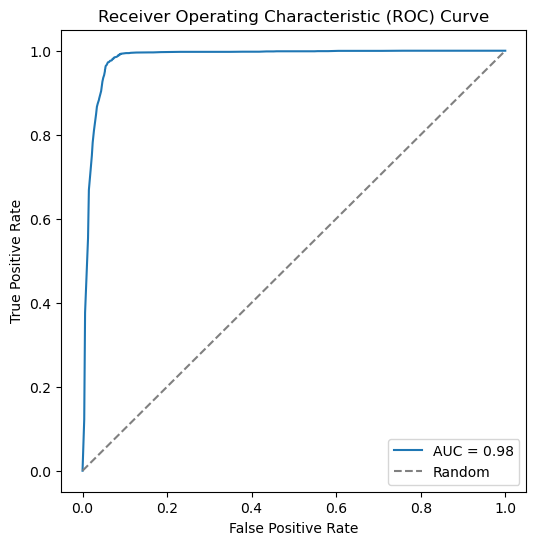

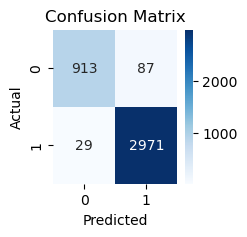

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,roc_curve
import matplotlib.pyplot as plt
# Read the CSV file from your local disk
df = pd.read_csv('virat_shuffled10.csv')

# Classification or regression
target = "heart_disease"

def label_encoding(column):
    le = LabelEncoder()
    if column.dtype == 'O':  # Check if the column type is object (string)
        le.fit(column)
        return le.transform(column)
    return column

# Apply label encoding to string columns
df = df.apply(label_encoding)

y = df[target].values
X = df.drop([target], axis=1)

# Normalizing all the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Split the data into training and testing sets (considering the last 20,000 rows for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the last 20,000 rows for testing
X_test_last_4k = X
y_test_last_4k = y
y_probabilities = rf_classifier.predict_proba(X_test_last_4k)[:,-1]  # Probabilities for class 1

# Adjust the threshold (you can experiment with different values)
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_probabilities > threshold).astype(int)

# Evaluate the performance of the model on the last 20,000 rows
accuracy = accuracy_score(y_test_last_4k, y_pred)
conf_matrix = confusion_matrix(y_test_last_4k, y_pred)

# Calculate Sensitivity and Specificity
true_positive = conf_matrix[1, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)


length_of_dataset = len(df)
print(f"Length of the dataset: {length_of_dataset}")

# Assuming you have a DataFrame df and the column of interest is 'heart_disease'
counts = df['heart_disease'].value_counts()

# Display the counts
print(counts)


# temp = pd.DataFrame(rf_classifier.predict_proba(X_test).tolist(), columns=rf_classifier.classes_)
# print(temp)


print(f"Accuracy rf : {accuracy*100:.2f}%")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

#auc-roc ratio
auc_roc = roc_auc_score(y_test_last_4k, y_probabilities)
print(f"AUC-ROC: {auc_roc*100}")

# #predict individually
# z=rf_classifier.predict([[1, 50, 0, 0, 26.97, 3.5, 145, 0]])
# print(z)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_last_4k, y_probabilities)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test_last_4k, y_probabilities):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test_last_4k and y_pred are already defined

# Generate confusion matrix
cm = confusion_matrix(y_test_last_4k, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            # yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)